#Zoe Depth Map Generation

Run the following two cells to setup the notebook

In [1]:
%load_ext autoreload
%autoreload 2
from google.colab import drive
drive.mount('/content/drive')
import os

GOOGLE_DRIVE_PATH_AFTER_MYDRIVE = 'UnseenObjectClustering'
GOOGLE_DRIVE_PATH = os.path.join('drive', 'My Drive', GOOGLE_DRIVE_PATH_AFTER_MYDRIVE)
print(os.listdir(GOOGLE_DRIVE_PATH))
#os.chdir(GOOGLE_DRIVE_PATH)

Mounted at /content/drive
['result_2018-08-23-11-34-44.pcd', 'README.md', 'LICENSE.md', '.gitignore', 'experiments', 'lib', '.git', 'tools', 'ros', 'data', 'requirement.txt', 'TOD.rar', 'output', 'python-pcl-0.2.0', 'bunny.pcd', 'bunny.pcd.1', 'TrainOnNewImages.ipynb', 'TestingSuite.ipynb', 'ZeroWasteTestingSuite.ipynb', 'DrewLAB.ipynb', 'zero_depth.ipynb']


In [2]:
import sys
sys.path.append("/content/" + GOOGLE_DRIVE_PATH)
sys.path.append("/content/" + GOOGLE_DRIVE_PATH + "/lib")
# sys.path.append(GOOGLE_DRIVE_PATH + "/lib/fcn")
print(GOOGLE_DRIVE_PATH)
print(sys.path)

drive/My Drive/UnseenObjectClustering
['/content', '/env/python', '/usr/lib/python39.zip', '/usr/lib/python3.9', '/usr/lib/python3.9/lib-dynload', '', '/usr/local/lib/python3.9/dist-packages', '/usr/lib/python3/dist-packages', '/usr/local/lib/python3.9/dist-packages/IPython/extensions', '/root/.ipython', '/content/drive/My Drive/UnseenObjectClustering', '/content/drive/My Drive/UnseenObjectClustering/lib']


#Installing dependencies to run ZoeDepth

In [3]:
import torch
!pip install timm
torch.hub.help("intel-isl/MiDaS", "DPT_BEiT_L_384", force_reload=True)  # Triggers fresh download of MiDaS repo

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 549.1/549.1 kB 15.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 200.1/200.1 kB 25.9 MB/s eta 0:00:00


/usr/local/lib/python3.9/dist-packages/torch/hub.py:286: UserWarning: You are about to download and run code from an untrusted repository. In a future release, this won't be allowed. To add the repository to your trusted list, change the command to {calling_fn}(..., trust_repo=False) and a command prompt will appear asking for an explicit confirmation of trust, or help(..., trust_repo=True), which will assume that the prompt is to be answered with 'yes'. You can also use help(..., trust_repo='check') which will only prompt for confirmation if the repo is not already trusted. This will eventually be the default behaviour
  warnings.warn(
Downloading: "https://github.com/intel-isl/MiDaS/zipball/master" to /root/.cache/torch/hub/master.zip


' # This docstring shows up in hub.help()\n    MiDaS DPT_BEiT_L_384 model for monocular depth estimation\n    pretrained (bool): load pretrained weights into model\n    '

#Load the pretrained ZoeDepth models here

In [4]:
import torch

repo = "isl-org/ZoeDepth"
# Zoe_N
model_zoe_n = torch.hub.load(repo, "ZoeD_N", pretrained=True)

# Zoe_K
model_zoe_k = torch.hub.load(repo, "ZoeD_K", pretrained=True)

# Zoe_NK
model_zoe_nk = torch.hub.load(repo, "ZoeD_NK", pretrained=True)

/usr/local/lib/python3.9/dist-packages/torch/hub.py:286: UserWarning: You are about to download and run code from an untrusted repository. In a future release, this won't be allowed. To add the repository to your trusted list, change the command to {calling_fn}(..., trust_repo=False) and a command prompt will appear asking for an explicit confirmation of trust, or load(..., trust_repo=True), which will assume that the prompt is to be answered with 'yes'. You can also use load(..., trust_repo='check') which will only prompt for confirmation if the repo is not already trusted. This will eventually be the default behaviour
  warnings.warn(
Downloading: "https://github.com/isl-org/ZoeDepth/zipball/main" to /root/.cache/torch/hub/main.zip


img_size [384, 512]


Using cache found in /root/.cache/torch/hub/intel-isl_MiDaS_master
/usr/local/lib/python3.9/dist-packages/torch/functional.py:504: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at ../aten/src/ATen/native/TensorShape.cpp:3483.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]
Downloading: "https://github.com/isl-org/ZoeDepth/releases/download/v1.0/ZoeD_M12_N.pt" to /root/.cache/torch/hub/checkpoints/ZoeD_M12_N.pt


Params passed to Resize transform:
	width:  512
	height:  384
	resize_target:  True
	keep_aspect_ratio:  True
	ensure_multiple_of:  32
	resize_method:  minimal
Using pretrained resource url::https://github.com/isl-org/ZoeDepth/releases/download/v1.0/ZoeD_M12_N.pt


100%|██████████| 1.34G/1.34G [00:09<00:00, 155MB/s]


Loaded successfully


Using cache found in /root/.cache/torch/hub/isl-org_ZoeDepth_main
Using cache found in /root/.cache/torch/hub/intel-isl_MiDaS_master


Overwriting config with config_version kitti
img_size [384, 768]


Downloading: "https://github.com/isl-org/ZoeDepth/releases/download/v1.0/ZoeD_M12_K.pt" to /root/.cache/torch/hub/checkpoints/ZoeD_M12_K.pt


Params passed to Resize transform:
	width:  768
	height:  384
	resize_target:  True
	keep_aspect_ratio:  True
	ensure_multiple_of:  32
	resize_method:  minimal
Using pretrained resource url::https://github.com/isl-org/ZoeDepth/releases/download/v1.0/ZoeD_M12_K.pt


100%|██████████| 1.34G/1.34G [00:22<00:00, 62.9MB/s]


Loaded successfully


Using cache found in /root/.cache/torch/hub/isl-org_ZoeDepth_main
Using cache found in /root/.cache/torch/hub/intel-isl_MiDaS_master


img_size [384, 512]
Params passed to Resize transform:
	width:  512
	height:  384
	resize_target:  True
	keep_aspect_ratio:  True
	ensure_multiple_of:  32
	resize_method:  minimal
Using pretrained resource url::https://github.com/isl-org/ZoeDepth/releases/download/v1.0/ZoeD_M12_NK.pt


Downloading: "https://github.com/isl-org/ZoeDepth/releases/download/v1.0/ZoeD_M12_NK.pt" to /root/.cache/torch/hub/checkpoints/ZoeD_M12_NK.pt
100%|██████████| 1.35G/1.35G [00:08<00:00, 165MB/s]


Loaded successfully


In [6]:
##### sample prediction
DEVICE = "cuda" if torch.cuda.is_available() else "cpu"
zoe = model_zoe_n.to(DEVICE)


# Local file
from PIL import Image
from zoedepth.utils.misc import colorize

#cd into whatever folder has your images
%cd "/content/drive/My Drive/UnseenObjectClustering/data/test/data/"


files = os.listdir()
files = files[:2]

for file in files:

    %cd "/content/drive/My Drive/UnseenObjectClustering/data/test/data/"

    image = Image.open(file).convert("RGB")
    image = image.resize((640, 480))  

    file, _ = file.split('.')

    depth_numpy = zoe.infer_pil(image)  # as numpy
    #depth_pil = zoe.infer_pil(image, output_type="pil")  # as 16-bit PIL Image   
    #depth_tensor = zoe.infer_pil(image, output_type="tensor")  # as torch tensor

    depth_tensor = depth_numpy
    # # Colorize output

    colored = colorize(depth_tensor)
    print(file)

    #Go to where file needs to be saved
    %cd "/content/drive/My Drive/UnseenObjectClustering/data/test/images/"
    Image.fromarray(colored).save(f"{file}_depth.png")
    image.save(f"{file}_color.png")

/content/drive/.shortcut-targets-by-id/1gjdFpKnPCCjX0XovUO8FJ7EhpPb1Bb3c/UnseenObjectClustering/data/test/data
/content/drive/.shortcut-targets-by-id/1gjdFpKnPCCjX0XovUO8FJ7EhpPb1Bb3c/UnseenObjectClustering/data/test/data
01_frame_000680
/content/drive/.shortcut-targets-by-id/1gjdFpKnPCCjX0XovUO8FJ7EhpPb1Bb3c/UnseenObjectClustering/data/test/images
/content/drive/.shortcut-targets-by-id/1gjdFpKnPCCjX0XovUO8FJ7EhpPb1Bb3c/UnseenObjectClustering/data/test/data
01_frame_000690
/content/drive/.shortcut-targets-by-id/1gjdFpKnPCCjX0XovUO8FJ7EhpPb1Bb3c/UnseenObjectClustering/data/test/images


Use the following block to visualize depth images

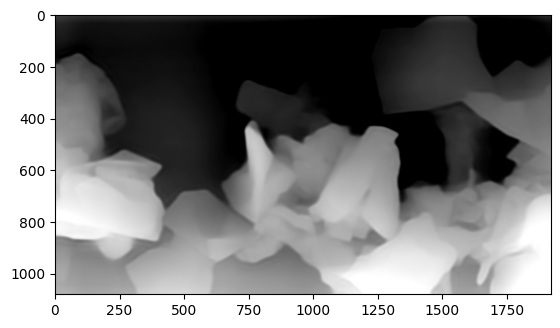

In [ ]:
colored = colorize(depth_tensor)
plt.imshow(colored)
colored = Image.fromarray(colored)
colored.save(fpath_colored)